### Resume Classification
#### Business objective:
*The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention*

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
import os.path
import win32com.client

nltk.download('punkt')

from pdf2docx import Converter
from matplotlib import pylab
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chinmay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
os.listdir('Resumes/')

['Peoplesoft resumes',
 'React JS',
 'SQL Developer Lightning insight',
 'workday resumes']

In [3]:
# User-Defined function to convert a doc file to docx file
def convert_doctodocx(baseDir):
    #print(baseDir)
    word = win32com.client.Dispatch("Word.application")
    for dir_path, dirs, files in os.walk(baseDir):
        for file_name in files:
            file_path = os.path.join(dir_path, file_name)
            #print(file_path)
            file_name, file_extension = os.path.splitext(file_path)
            if "~$" not in file_name:
                if file_extension.lower() == '.doc': #
                    docx_file = '{0}{1}'.format(file_path, 'x')
                    if not os.path.isfile(docx_file): # Skip conversion where docx file already exists
                        file_path = os.path.abspath(file_path)
                        docx_file = os.path.abspath(docx_file)
                        try:
                            wordDoc = word.Documents.Open(file_path)
                            wordDoc.SaveAs2(docx_file, FileFormat = 16)
                            wordDoc.Close()
                        except Exception as e:
                            print('Failed to Convert: {0}'.format(file_path))
                            print(e)

In [4]:
file_path1 = []
category1  = []
directory1 = 'Resumes/Peoplesoft resumes/'
convert_doctodocx(directory1)
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [5]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Cat1'] = category1
data1

,Raw_Details,Cat1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


In [6]:
file_path2 = []
category2  = []
directory2 = 'Resumes/SQL Developer Lightning insight/'
convert_doctodocx(directory2)
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('SQL Developer')

In [7]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Cat2'] = category2
data2

,Raw_Details,Cat2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [8]:
file_path3 = []
category3  = []
directory3 = 'Resumes/workday resumes/'
convert_doctodocx(directory3)
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('Workday')

In [9]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Cat3'] = category3
data3

,Raw_Details,Cat3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


In [10]:
# Converting pdf files to docx
path = r'Resumes\React Js'
for file in os.listdir(path):
    if file.endswith('.pdf'):
        final = os.path.join(path, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path + '/' + basename+'1.docx', start=0, end=None)
        cv.close()

[INFO] Start to convert Resumes\React Js\Reactjs Developer_Prabakaran_Musquare Technologies.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...


Reactjs Developer_Prabakaran_Musquare Technologies


[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 2.37s.


In [11]:
file_path4 = []
category4  = []
directory4 = 'Resumes/React Js/'
convert_doctodocx(directory4)
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('ReactJS Developer')

In [12]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Cat4'] = category4
data4

,Raw_Details,Cat4
0,Name: Ravali P \n\n\n\n ...,ReactJS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,ReactJS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,ReactJS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,ReactJS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,ReactJS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,ReactJS Developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,ReactJS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,ReactJS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",ReactJS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,ReactJS Developer


In [13]:
# Creating Resume Dataframe
resume_df = data1.append([data2, data3, data4], ignore_index = True)
resume_df

,Raw_Details,Cat1,Cat2,Cat3,Cat4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,NaN,NaN,NaN,ReactJS Developer
75,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,NaN,NaN,NaN,ReactJS Developer
76,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,NaN,NaN,NaN,ReactJS Developer
77,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,NaN,NaN,NaN,ReactJS Developer


In [14]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Cat1         20 non-null     object
 2   Cat2         14 non-null     object
 3   Cat3         21 non-null     object
 4   Cat4         24 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [15]:
#Creating a new feature by adding all other features
resume_df['Cat'] = category1 + category2 + category3 + category4
resume_df

,Raw_Details,Cat1,Cat2,Cat3,Cat4,Cat
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,NaN,NaN,NaN,ReactJS Developer,ReactJS Developer
75,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,NaN,NaN,NaN,ReactJS Developer,ReactJS Developer
76,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,NaN,NaN,NaN,ReactJS Developer,ReactJS Developer
77,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,NaN,NaN,NaN,ReactJS Developer,ReactJS Developer


In [16]:
#Dropping other features
resume_df.drop(['Cat1', 'Cat2', 'Cat3', 'Cat4'], axis = 1, inplace = True)
resume_df = resume_df[["Cat", "Raw_Details"]]

In [17]:
#Final dataset
resume_df

,Cat,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
74,ReactJS Developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
75,ReactJS Developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...
76,ReactJS Developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
77,ReactJS Developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...


In [18]:
resume_df.shape

(79, 2)

In [19]:
#Creating CSV File

resume_df.to_csv('All_Resumes.csv', index=False)

In [20]:
resume_df = pd.read_csv("All_Resumes.csv")
resume_df

,Cat,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
74,ReactJS Developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
75,ReactJS Developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...
76,ReactJS Developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
77,ReactJS Developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...


In [21]:
resume_df.isnull().sum()

Cat            0
Raw_Details    0
dtype: int64

### Words in resumes

In [22]:
resume_df['Word_Count'] = resume_df['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_df[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1441
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


### Charectors in resumes

In [23]:
resume_df['Char_Count'] = resume_df['Raw_Details'].str.len() ## this also includes spaces
resume_df[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


### Stop Words in resumes

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_df['Stopwords'] = resume_df['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_df[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


### Numerics in resumes

In [25]:
resume_df['Numerics'] = resume_df['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_df[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [26]:
resume_df

,Cat,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
74,ReactJS Developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,777,3273,70,5
75,ReactJS Developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,305,2699,60,8
76,ReactJS Developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,194,1773,51,8
77,ReactJS Developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,435,3299,86,4


## Text Preprocessing


In [27]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [28]:
resume_data = pd.read_csv('all_Resumes.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [29]:
resume_data

,Cat,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu profile summary years experience...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,ReactJS Developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,khizaruddin rauf experience currently working ...
75,ReactJS Developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,name prabakaran title developer professional s...
76,ReactJS Developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,pranish sonone career summary experience years...
77,ReactJS Developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,ranga gaganam professional summary professiona...


## Clean data new CSV

In [30]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,ReactJS Developer,khizaruddin rauf experience currently working ...
75,ReactJS Developer,name prabakaran title developer professional s...
76,ReactJS Developer,pranish sonone career summary experience years...
77,ReactJS Developer,ranga gaganam professional summary professiona...


In [31]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [32]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,ReactJS Developer,khizaruddin rauf experience currently working ...
75,ReactJS Developer,name prabakaran title developer professional s...
76,ReactJS Developer,pranish sonone career summary experience years...
77,ReactJS Developer,ranga gaganam professional summary professiona...


In [33]:
resume_data.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

## Named Entity Recognition 

In [34]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


## Parts Of Speech Tagging

In [35]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [36]:
for token in doc_block[:30]:
    print(token,token.pos_) 

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


## Filtering out only the Nouns and Verbs from the Text to Tokens

In [37]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

## Counting all the Nouns and Verbs present in the Tokens of words

In [38]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,417
2,using,384
3,workday,353
4,reports,326
5,data,307
6,project,289
7,business,260
8,server,243
9,web,237


## Visualizing the Result of Top 20 Nouns and Verbs most Frequently

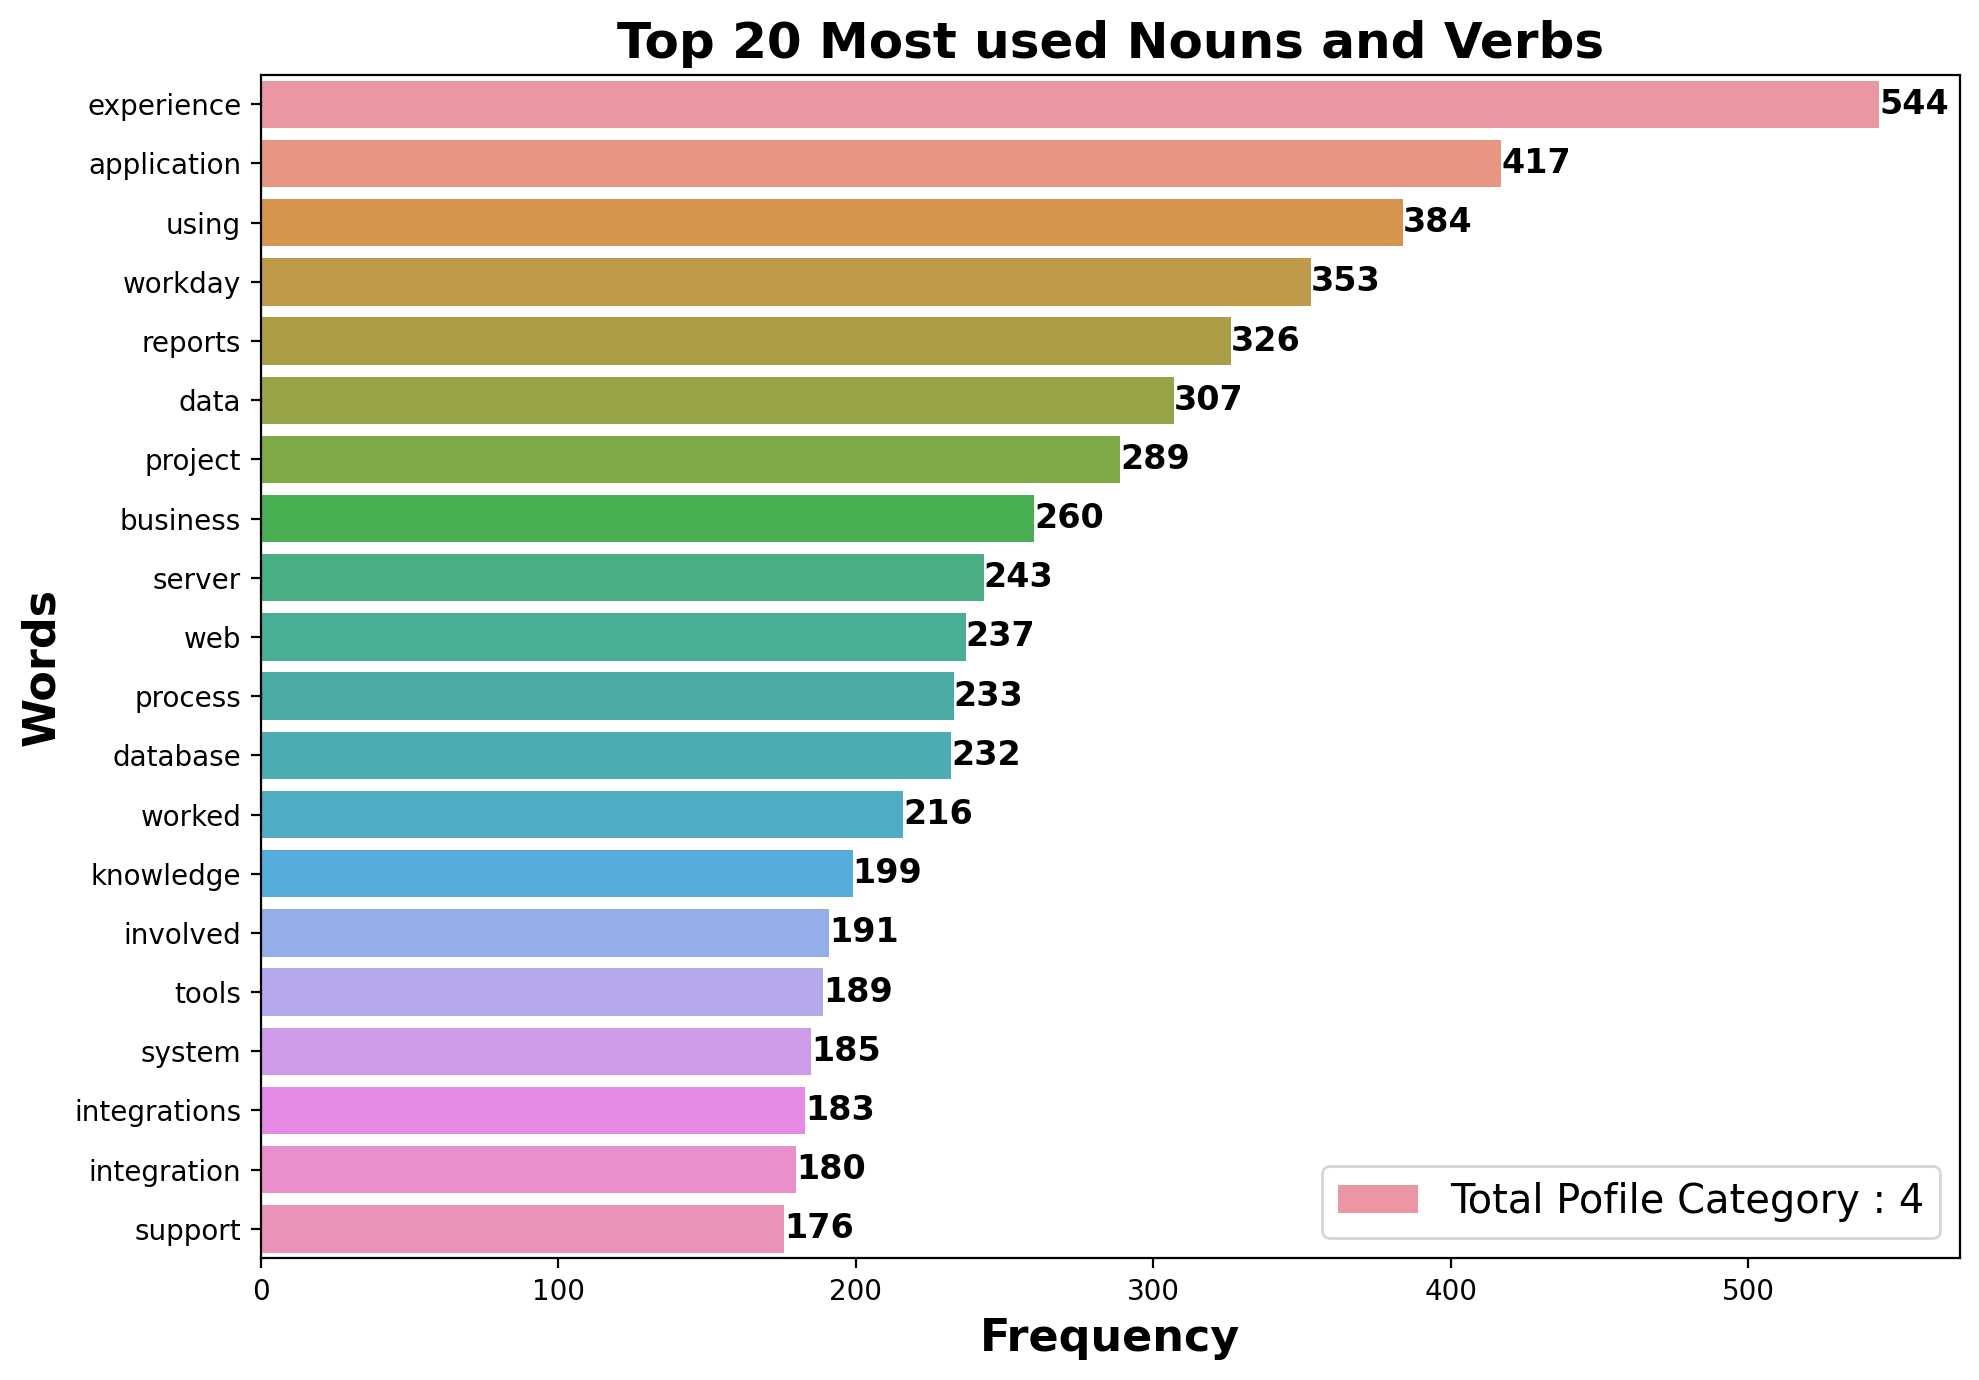

In [39]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Cat.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Nouns and Verbs', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

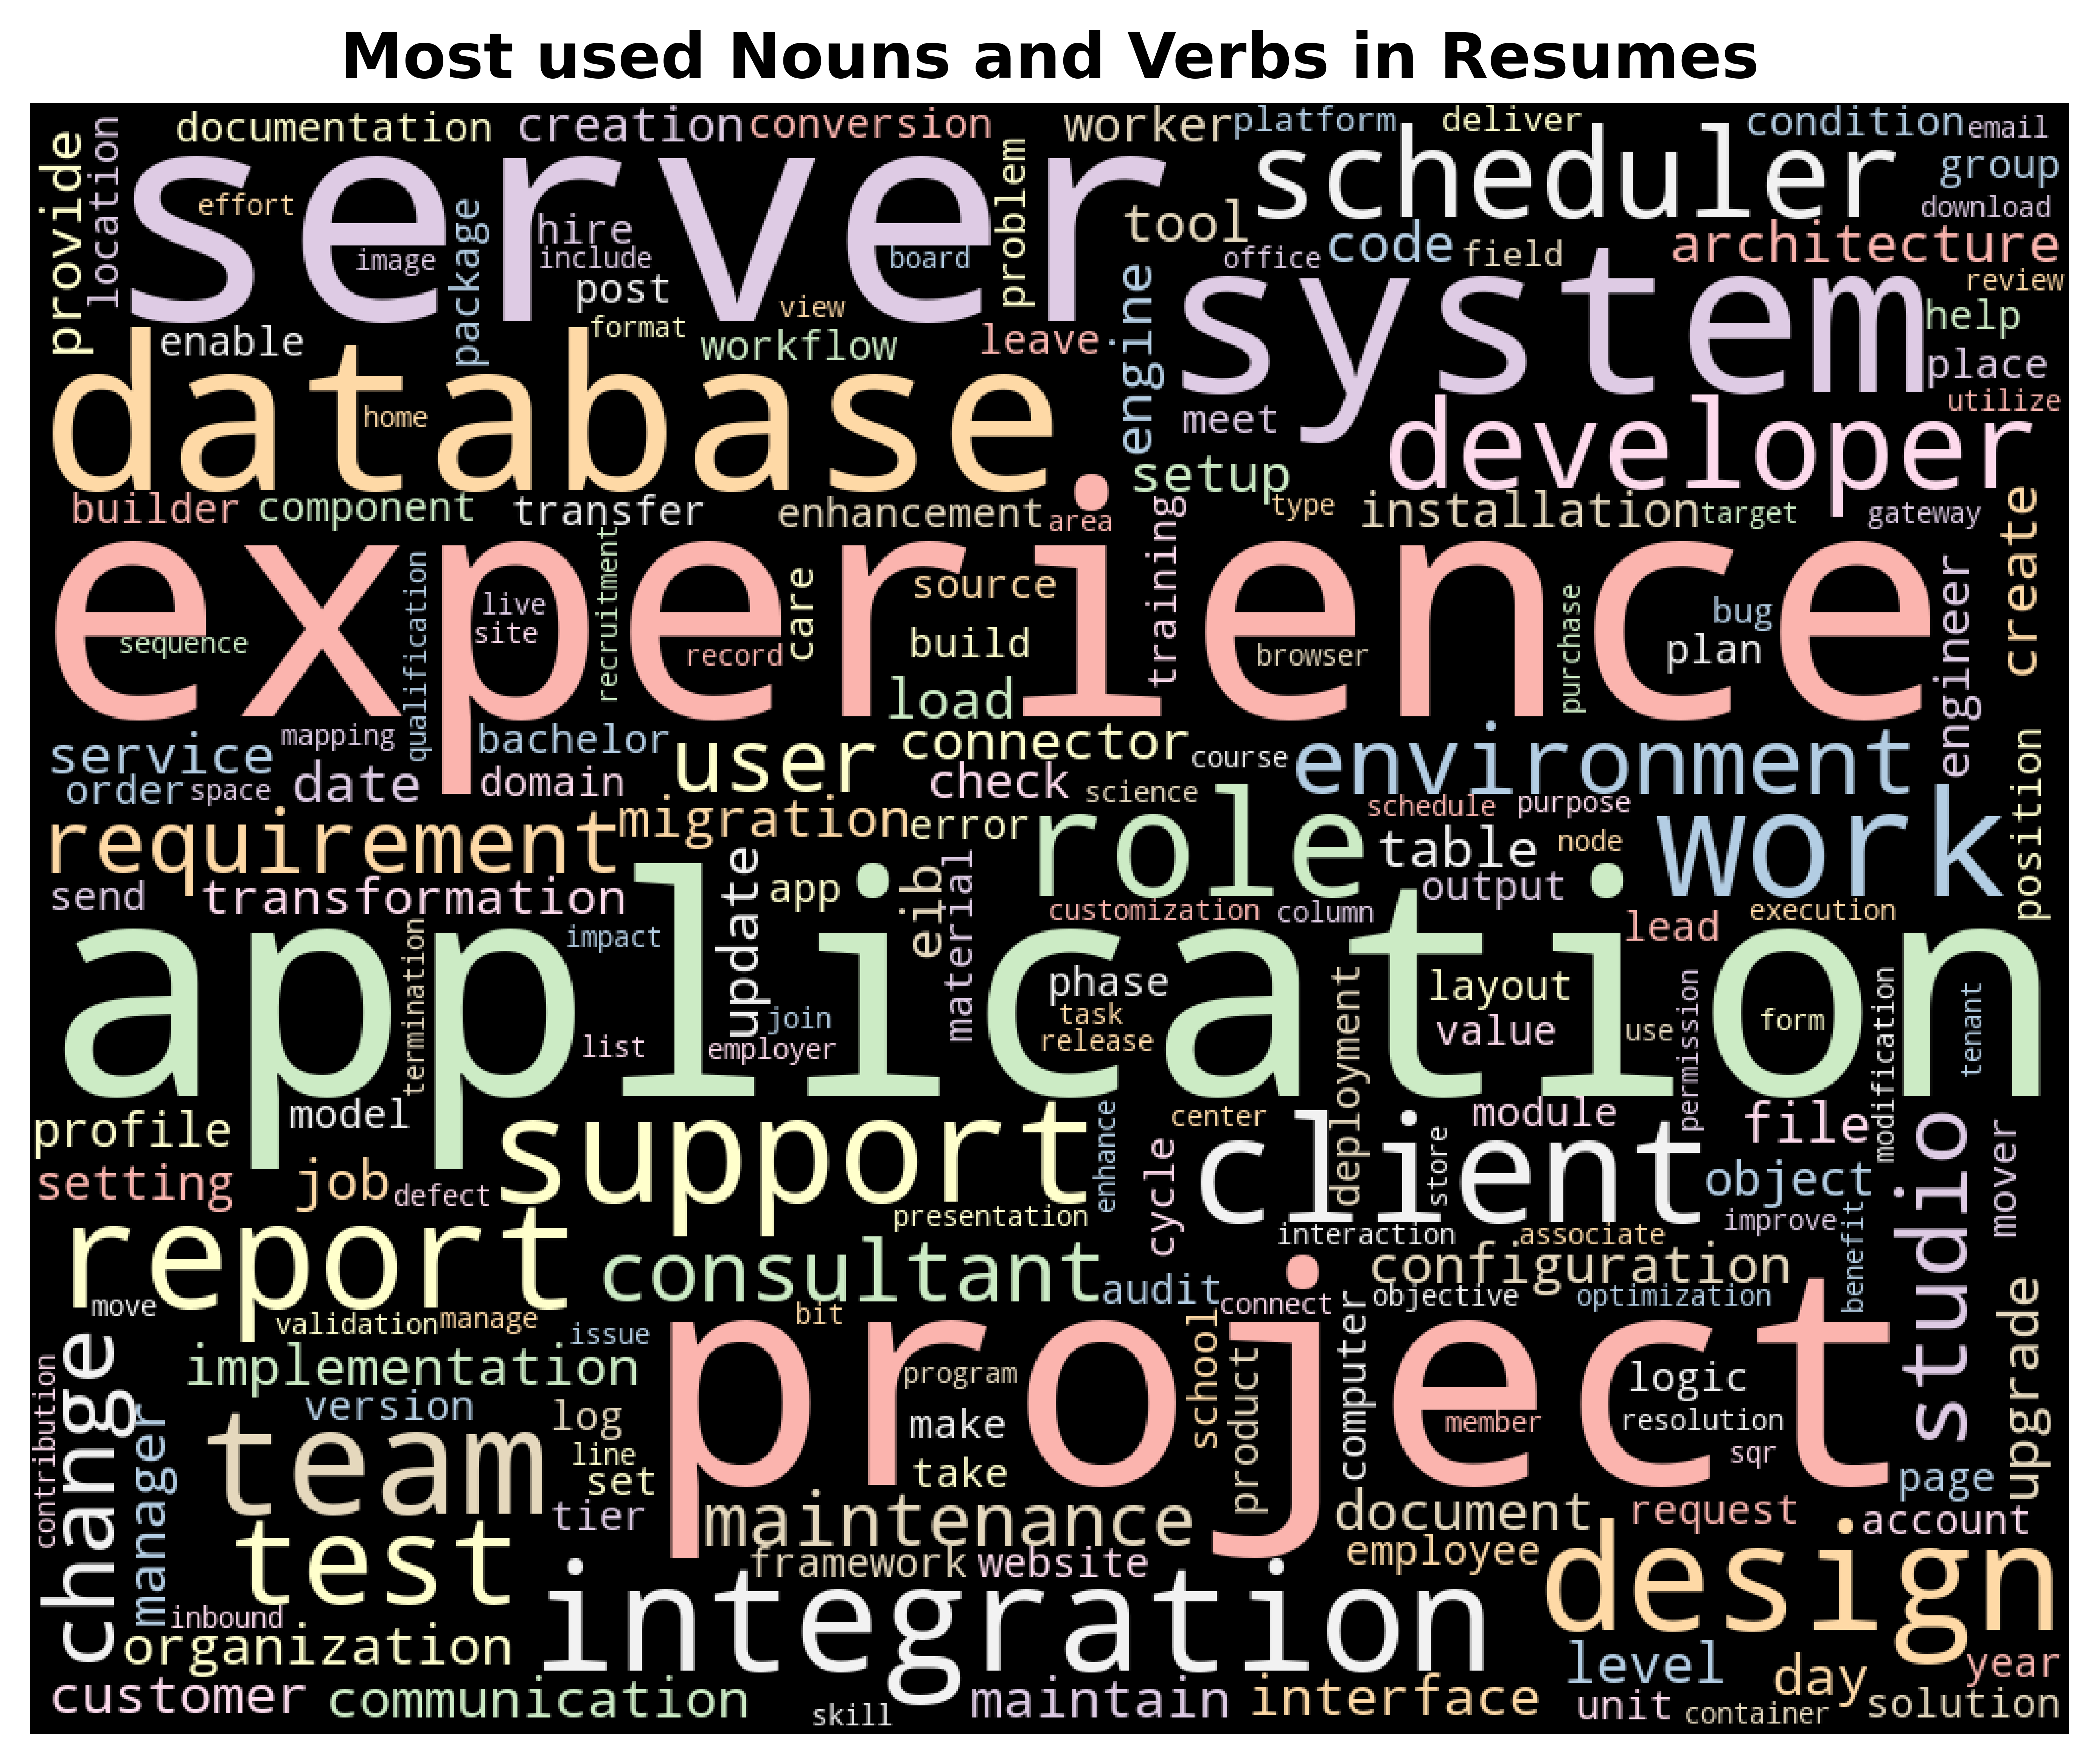

In [46]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()